# Evaluating Orignial predictions vs Weather Weighted predictions

Comparing weather weighted predictions made in the predictions section, with the original predictions.

In [1]:
import os.path
import datetime
import pandas as pd
import numpy as np
import hashlib
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform, pdist
from sklearn.metrics import mean_squared_error
from math import sqrt
%matplotlib inline

# Display all columns in Pandas
pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv('../../data/weather_pace_predictions.csv', encoding = "ISO-8859-1")

In [3]:
df.head()

,Unnamed: 0,category,gender,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_average_pace,weighted_mean,euc_weighted_mean
0,0,Senior Men (23-39),Male,14.183180,13.589501,11.939618,13.268314,13.268791,13.182445
1,1,Senior Men (23-39),Male,15.088612,13.589501,12.676387,14.406557,14.405696,14.389533
2,2,Masters Men 1 (40-49),Male,16.802140,15.121991,14.413524,15.701139,15.701881,15.564509
3,3,Masters Men 1 (40-49),Male,16.236556,16.326208,14.475365,15.200261,15.200349,14.962338
4,4,Senior Men (23-39),Male,17.313847,17.965522,12.897879,15.722523,15.722237,15.716331


In [4]:
df['pb_error'] = df.best_pb_prediction - df.query_pb
df['pb_error'] = df.pb_error.abs()
df['mean_error'] = df.mean_pb_average_pace - df.query_pb
df['mean_error'] = df.mean_error.abs()
df['cos_error'] = df.weighted_mean - df.query_pb
df['cos_error'] = df.cos_error.abs()
df['euc_error'] = df.euc_weighted_mean - df.query_pb
df['euc_error'] = df.euc_error.abs()

In [5]:
df = df.dropna()

In [6]:
df1 = pd.read_csv('../../data/pace_predictions.csv', encoding = "ISO-8859-1")

In [7]:
df1.head()

,Unnamed: 0,category,gender,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_average_pace,weighted_mean,euc_weighted_mean
0,0,Senior Men (23-39),Male,14.183180,13.489501,11.680842,13.330479,13.330815,13.089284
1,1,Senior Men (23-39),Male,15.188612,13.489501,12.564133,14.455599,14.455653,14.593701
2,2,Senior Men (23-39),Male,16.367387,13.945114,14.427646,15.297827,15.298082,15.796754
3,3,Masters Men 1 (40-49),Male,17.602140,15.121991,14.267966,15.590489,15.591208,15.625839
4,4,Masters Men 1 (40-49),Male,14.964501,13.769848,13.358058,14.010092,14.010088,13.451506


In [8]:
df1['pb_error'] = df1.best_pb_prediction - df1.query_pb
df1['pb_error'] = df1.pb_error.abs()
df1['mean_error'] = df1.mean_pb_average_pace - df1.query_pb
df1['mean_error'] = df1.mean_error.abs()
df1['cos_error'] = df1.weighted_mean - df1.query_pb
df1['cos_error'] = df1.cos_error.abs()
df1['euc_error'] = df1.euc_weighted_mean - df1.query_pb
df1['euc_error'] = df1.euc_error.abs()

In [9]:
df1 = df1.dropna()

In [10]:

abestpb = sqrt(mean_squared_error(df.query_pb, df.best_pb_prediction))
ameanpb = sqrt(mean_squared_error(df.query_pb, df.mean_pb_average_pace))
aweightpb = sqrt(mean_squared_error(df.query_pb, df.weighted_mean))
aeucpb = sqrt(mean_squared_error(df.query_pb, df.euc_weighted_mean))

print('WW Fastest Case Error:', abestpb)
print('WW Mean of Cases Error:', ameanpb)
print('WW Weighted Mean:', aweightpb)
print('WW Euclidean Weighted Mean:', aeucpb)

WW Fastest Case Error: 1.7388443489693393
WW Mean of Cases Error: 1.1285620229556508
WW Weighted Mean: 1.1284078179878558
WW Euclidean Weighted Mean: 1.12227049171231


In [11]:
abestpb1 = sqrt(mean_squared_error(df1.query_pb, df1.best_pb_prediction))
ameanpb1 = sqrt(mean_squared_error(df1.query_pb, df1.mean_pb_average_pace))
aweightpb1 = sqrt(mean_squared_error(df1.query_pb, df1.weighted_mean))
aeucpb1 = sqrt(mean_squared_error(df1.query_pb, df1.euc_weighted_mean))

print('Fastest Case Error:', abestpb1)
print('Mean of Cases Error:', ameanpb1)
print('Weighted Mean:', aweightpb1)
print('Euclidean Weighted Mean:', aeucpb1)

Fastest Case Error: 1.859556323248879
Mean of Cases Error: 1.2705799879828616
Weighted Mean: 1.270590388962552
Euclidean Weighted Mean: 1.2440844666270396


In [12]:
mean = [ameanpb, ameanpb1 ]
best = [abestpb, abestpb1]
w_mean = [aweightpb, aweightpb1]
euc_mean =[aeucpb, aeucpb1]

In [13]:
original = [ameanpb1, abestpb1, aweightpb1, aeucpb1]
weather = [ameanpb, abestpb, aweightpb, aeucpb]

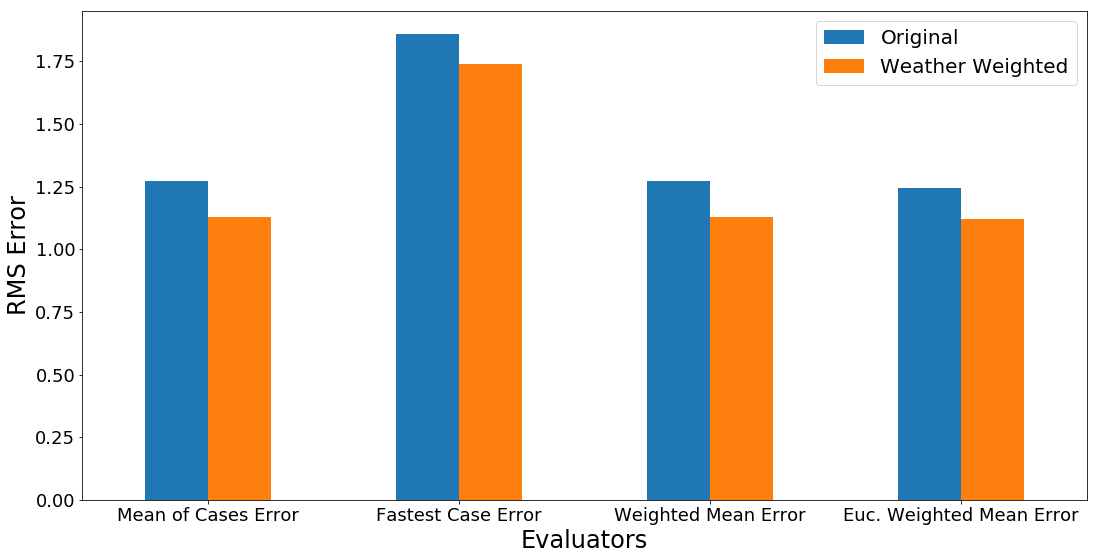

In [14]:
index = ['Mean of Cases Error', 'Fastest Case Error', 'Weighted Mean Error', 'Euc. Weighted Mean Error']
gra_w = pd.DataFrame({'Original': original, 'Weather Weighted': weather}, index=index)
ax = gra_w.plot.bar(figsize=(18, 9), fontsize=18, rot=0)
ax.set_ylabel('RMS Error', fontsize = 24)
ax.set_xlabel('Evaluators', fontsize = 24)
ax.legend(fontsize = 20)

### Percentage

In [15]:
wabestper = ((df.pb_error / df.query_pb) * 100).mean()
wameanper = ((df.mean_error / df.query_pb) * 100).mean()
wacosper = ((df.cos_error / df.query_pb) * 100).mean()
waeucper = ((df.euc_error / df.query_pb) * 100).mean()

print('Fastest Case Percentage: ', wabestper)
print('Mean of Cases Percentage: ',  wameanper)
print('Cosine Mean %:',  wacosper)
print('Euclidean Mean %: ', waeucper)

Fastest Case Percentage:  9.725820029732732
Mean of Cases Percentage:  6.478258829197722
Cosine Mean %: 6.476191045871667
Euclidean Mean %:  6.387971848673327


In [16]:
abestper = ((df1.pb_error / df1.query_pb) * 100).mean()
ameanper = ((df1.mean_error / df1.query_pb) * 100).mean()
acosper = ((df1.cos_error / df1.query_pb) * 100).mean()
aeucper = ((df1.euc_error / df1.query_pb) * 100).mean()

print('Fastest Case Percentage: ', abestper)
print('Mean of Cases Percentage: ',  ameanper)
print('Cosine Mean %:',  acosper)
print('Euclidean Mean %: ', aeucper)

Fastest Case Percentage:  9.864390074446712
Mean of Cases Percentage:  6.946618220570911
Cosine Mean %: 6.945719489183475
Euclidean Mean %:  6.725855221333613


In [17]:
abestper - wabestper

0.1385700447139797

In [18]:
ameanper - wameanper

0.4683593913731885

In [19]:
acosper - wacosper

0.4695284433118072

In [20]:
aeucper - waeucper

0.33788337266028634

In [21]:
original1 = [ameanper, abestper, acosper, aeucper]
weather1 = [wameanper, wabestper, wacosper, waeucper]

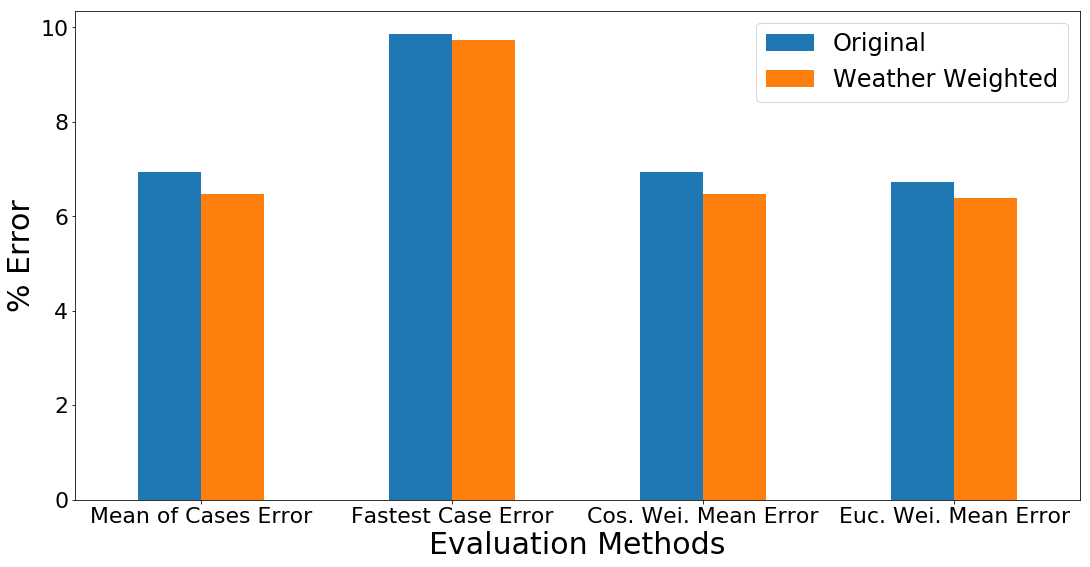

In [22]:
index = ['Mean of Cases Error', 'Fastest Case Error', 'Cos. Wei. Mean Error', 'Euc. Wei. Mean Error']
gra_w = pd.DataFrame({'Original': original1, 'Weather Weighted': weather1}, index=index)
ax = gra_w.plot.bar(figsize=(18, 9), fontsize=22, rot=0)
ax.set_ylabel('% Error', fontsize = 30)
ax.set_xlabel('Evaluation Methods', fontsize = 30)
ax.legend(fontsize = 24)

As mentioned in section 4.1.3, the average pace was weighted according to the mean degrees
Celsius temperature on the day of the race.
Under each evaluation method, the weather weighted average pace prediction has produced a
better result than the original predictions. The difference between the mean errors is almost half
a percent. Using a working example, for a a runner with 10 minute per kilometre pace, the original
prediction would have been around 9.3 minutes per kilometre. The weather weighted prediction
would have been around 9.35 minutes per kilometre. These are very encouraging results


# Western States Weather

Same method for Western States...

In [23]:
df = pd.read_csv('../../data/wea_ws_pace_predictions.csv', encoding = "ISO-8859-1")

In [24]:
df.head()

,Unnamed: 0,category,gender,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_average_pace,weighted_mean,euc_weighted_mean
0,0,Masters Men 1 (40-49),Male,11.804720,10.505747,9.740745,11.254935,11.253518,10.769839
1,1,Masters Men 1 (40-49),Male,12.242579,9.251986,9.547084,10.802511,10.789664,10.484158
2,2,Masters Men 2 (50-59),Male,10.913974,13.759780,9.450123,11.058064,11.058902,11.051297
3,3,Masters Men 2 (50-59),Male,11.844286,11.503364,9.773393,11.124727,11.124374,11.236092
4,4,Senior Women (23-39),Female,9.080386,9.710111,8.560169,8.348444,8.345238,8.338878


In [25]:
df['pb_error'] = df.best_pb_prediction - df.query_pb
df['pb_error'] = df.pb_error.abs()
df['mean_error'] = df.mean_pb_average_pace - df.query_pb
df['mean_error'] = df.mean_error.abs()
df['cos_error'] = df.weighted_mean - df.query_pb
df['cos_error'] = df.cos_error.abs()
df['euc_error'] = df.euc_weighted_mean - df.query_pb
df['euc_error'] = df.euc_error.abs()

In [26]:
df = df.dropna()

In [27]:
df1 = pd.read_csv('../../data/ws_pace_predictions.csv', encoding = "ISO-8859-1")

In [28]:
df1.head()

,Unnamed: 0,category,gender,query_AVG_Pace,query_pb,best_pb_prediction,mean_pb_average_pace,weighted_mean,euc_weighted_mean
0,0,Masters Men 1 (40-49),Male,11.804720,10.605747,9.668829,10.744975,10.744982,10.741196
1,1,Masters Men 1 (40-49),Male,12.242579,9.051986,9.301479,10.748605,10.737365,10.455589
2,2,Masters Men 2 (50-59),Male,10.913974,13.559780,9.043635,11.401750,11.402140,11.241669
3,3,Masters Men 2 (50-59),Male,11.844286,11.303364,9.881917,11.274727,11.274394,11.425228
4,4,Senior Women (23-39),Female,9.080386,9.710111,9.063317,8.450547,8.448198,8.442814


In [29]:
df1['pb_error'] = df1.best_pb_prediction - df1.query_pb
df1['pb_error'] = df1.pb_error.abs()
df1['mean_error'] = df1.mean_pb_average_pace - df1.query_pb
df1['mean_error'] = df1.mean_error.abs()
df1['cos_error'] = df1.weighted_mean - df1.query_pb
df1['cos_error'] = df1.cos_error.abs()
df1['euc_error'] = df1.euc_weighted_mean - df1.query_pb
df1['euc_error'] = df1.euc_error.abs()

In [30]:
df1 = df1.dropna()

In [31]:

abestpb = sqrt(mean_squared_error(df.query_pb, df.best_pb_prediction))
ameanpb = sqrt(mean_squared_error(df.query_pb, df.mean_pb_average_pace))
aweightpb = sqrt(mean_squared_error(df.query_pb, df.weighted_mean))
aeucpb = sqrt(mean_squared_error(df.query_pb, df.euc_weighted_mean))

print('WW Fastest Case Error:', abestpb)
print('WW Mean of Cases Error:', ameanpb)
print('WW Weighted Mean:', aweightpb)
print('WW Euclidean Weighted Mean:', aeucpb)

WW Fastest Case Error: 1.4709964892673915
WW Mean of Cases Error: 1.0962011603968358
WW Weighted Mean: 1.0944130340639013
WW Euclidean Weighted Mean: 1.0998692934580283


In [32]:
abestpb1 = sqrt(mean_squared_error(df1.query_pb, df1.best_pb_prediction))
ameanpb1 = sqrt(mean_squared_error(df1.query_pb, df1.mean_pb_average_pace))
aweightpb1 = sqrt(mean_squared_error(df1.query_pb, df1.weighted_mean))
aeucpb1 = sqrt(mean_squared_error(df1.query_pb, df1.euc_weighted_mean))

print('Fastest Case Error:', abestpb1)
print('Mean of Cases Error:', ameanpb1)
print('Weighted Mean:', aweightpb1)
print('Euclidean Weighted Mean:', aeucpb1)

Fastest Case Error: 1.4780436098708476
Mean of Cases Error: 1.0993162887031076
Weighted Mean: 1.0979853561678345
Euclidean Weighted Mean: 1.0849450506024692


In [33]:
mean = [ameanpb, ameanpb1 ]
best = [abestpb, abestpb1]
w_mean = [aweightpb, aweightpb1]
euc_mean =[aeucpb, aeucpb1]

In [34]:
original = [ameanpb1, abestpb1, aweightpb1, aeucpb1]
weather = [ameanpb, abestpb, aweightpb, aeucpb]

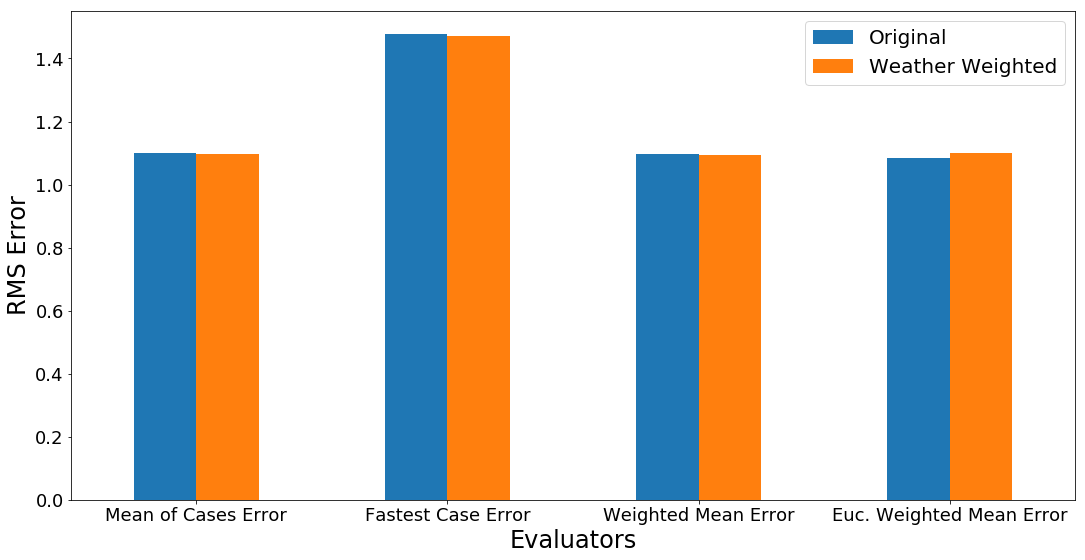

In [35]:
index = ['Mean of Cases Error', 'Fastest Case Error', 'Weighted Mean Error', 'Euc. Weighted Mean Error']
gra_w = pd.DataFrame({'Original': original, 'Weather Weighted': weather}, index=index)
ax = gra_w.plot.bar(figsize=(18, 9), fontsize=18, rot=0)
ax.set_ylabel('RMS Error', fontsize = 24)
ax.set_xlabel('Evaluators', fontsize = 24)
ax.legend(fontsize = 20)

### Percentage

In [36]:
wabestper = ((df.pb_error / df.query_pb) * 100).mean()
wameanper = ((df.mean_error / df.query_pb) * 100).mean()
wacosper = ((df.cos_error / df.query_pb) * 100).mean()
waeucper = ((df.euc_error / df.query_pb) * 100).mean()

print('Fastest Case Percentage: ', wabestper)
print('Mean of Cases Percentage: ',  wameanper)
print('Cosine Mean %:',  wacosper)
print('Euclidean Mean %: ', waeucper)

Fastest Case Percentage:  11.291276260193763
Mean of Cases Percentage:  9.266204024849069
Cosine Mean %: 9.249742557769844
Euclidean Mean %:  9.229520908241613


In [37]:
abestper = ((df1.pb_error / df1.query_pb) * 100).mean()
ameanper = ((df1.mean_error / df1.query_pb) * 100).mean()
acosper = ((df1.cos_error / df1.query_pb) * 100).mean()
aeucper = ((df1.euc_error / df1.query_pb) * 100).mean()

print('Fastest Case Percentage: ', abestper)
print('Mean of Cases Percentage: ',  ameanper)
print('Cosine Mean %:',  acosper)
print('Euclidean Mean %: ', aeucper)

Fastest Case Percentage:  11.444261165925372
Mean of Cases Percentage:  9.201500417984496
Cosine Mean %: 9.190575338058396
Euclidean Mean %:  9.155469352672926


In [38]:
original1 = [ameanper, abestper, acosper, aeucper]
weather1 = [wameanper, wabestper, wacosper, waeucper]

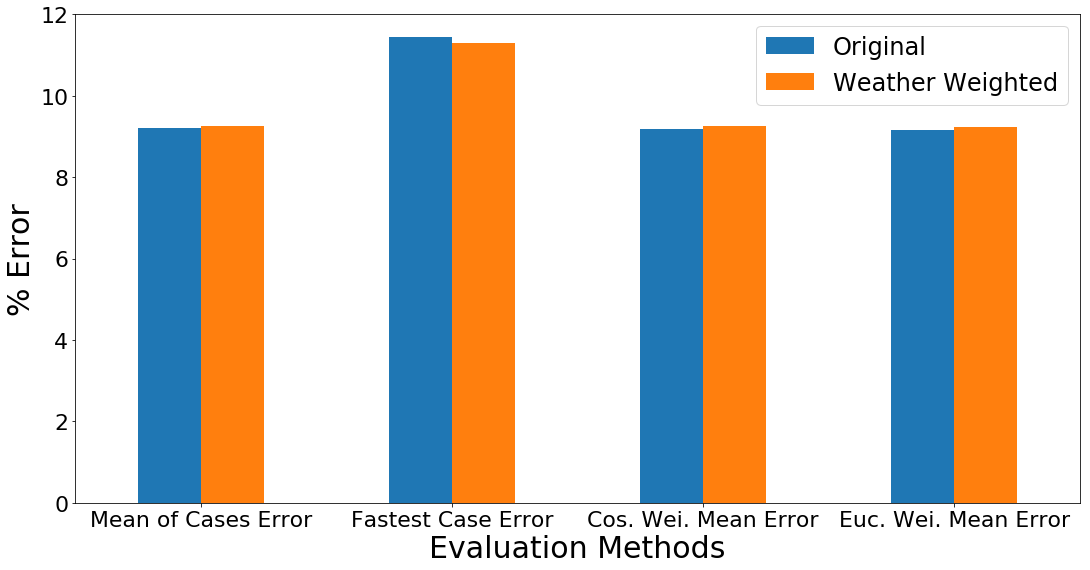

In [39]:
index = ['Mean of Cases Error', 'Fastest Case Error', 'Cos. Wei. Mean Error', 'Euc. Wei. Mean Error']
gra_w = pd.DataFrame({'Original': original1, 'Weather Weighted': weather1}, index=index)
ax = gra_w.plot.bar(figsize=(18, 9), fontsize=22, rot=0)
ax.set_ylabel('% Error', fontsize = 30)
ax.set_xlabel('Evaluation Methods', fontsize = 30)
ax.legend(fontsize = 24)

It is important to investigate whether these predictions are unique to the UTMB. The same model
was used to predict average pace for the Western States, i.e. Historical non PB Western States
average paces were used to predict a PB average pace for Western States.
There is a very similar trend to the UTMB predictions. The predictions for females is considerably
lower for each error metric. For males, the errors are just under 12% for fastest case and under
10% for mean of cases error. In comparison, the fastest case error for females is under 9% and
mean of cases error is under 8%. This is very encouraging for female runners, as the ratio of
females to males is far higher here than in the UTMB, as seen in Figure 3.9. In terms of the
mean of cases error, euclidean weighted mean produces the best result.
